In [1]:
from google.oauth2 import service_account
from google.cloud import bigquery
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import font_manager,rc

plt.rc("font", family = "Malgun gothic")

In [2]:
credentials = service_account.Credentials.from_service_account_file("./teamproject_key.json")

In [3]:
client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [4]:
p = """
SELECT
    FORMAT_DATE('%Y', `teamproject-428905.kim.public_transportation_city`.`연도`) AS `연도`,
    `teamproject-428905.kim.public_transportation_city`.`서울_전체` AS `서울`,
    `teamproject-428905.kim.public_transportation_city`.`부산_전체` AS `부산`,
    `teamproject-428905.kim.public_transportation_city`.`대구_전체` AS `대구`,
    `teamproject-428905.kim.public_transportation_city`.`인천_전체` AS `인천`,
    `teamproject-428905.kim.public_transportation_city`.`광주_전체` AS `광주`,
    `teamproject-428905.kim.public_transportation_city`.`대전_전체` AS `대전`,
    `teamproject-428905.kim.public_transportation_city`.`울산_전체` AS `울산`,
    `teamproject-428905.kim.public_transportation_city`.`세종_전체` AS `세종`,
    `teamproject-428905.kim.public_transportation_city`.`경기도_전체` AS `경기`,
    `teamproject-428905.kim.public_transportation_city`.`강원도_전체` AS `강원`,
    `teamproject-428905.kim.public_transportation_city`.`충청북도_전체` AS `충북`,
    `teamproject-428905.kim.public_transportation_city`.`충청남도_전체` AS `충남`,
    `teamproject-428905.kim.public_transportation_city`.`전라북도_전체` AS `전북`,
    `teamproject-428905.kim.public_transportation_city`.`전라남도_전체` AS `전남`,
    `teamproject-428905.kim.public_transportation_city`.`경상북도_전체` AS `경북`,
    `teamproject-428905.kim.public_transportation_city`.`경상남도_전체` AS `경남`,
    `teamproject-428905.kim.public_transportation_city`.`제주_전체` AS `제주`
FROM
    `teamproject-428905.kim.public_transportation_city`
"""

In [5]:
p_df = client.query(p).to_dataframe()

C:\Users\rlawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
p_df

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,2014,5521246,992160,533420,870816,222973,263065,156778,0,3463112,95456,108254,145429,97654,121197,119899,202597,52286
1,2015,4307072,991973,551440,759421,239529,262923,158319,15565,2905667,103442,118203,181763,123749,87826,164254,279745,57711
2,2016,4303178,1051986,551789,752470,229251,267391,156654,19683,2896723,99025,118313,172544,119064,121425,167992,267455,59801
3,2017,4423933,957502,547568,775463,245970,272079,152499,22677,2981638,85734,117371,148613,118447,120123,166009,253772,63008
4,2018,4343439,1010546,484403,810916,215232,254703,137686,23443,3092814,99807,105412,126255,112722,116302,164903,336477,79116
5,2019,4418869,1061218,500344,786062,218676,256699,141625,28297,3001018,94314,115259,169062,120672,124185,165064,343605,82940
6,2020,3295971,755853,285446,547445,139922,169340,92606,20319,2159097,55231,69423,109303,81279,86759,88514,220950,57551
7,2021,3493041,827043,398102,582456,164802,192403,103108,26623,2339021,66741,76629,121205,87534,102009,103193,240704,78443
8,2022,3605329,899035,413496,655928,171166,211189,114787,29422,2463040,72019,92489,159544,98931,103419,123312,276989,79382
9,2023,3839289,927562,420294,678447,175721,222818,118456,32313,2599388,78533,97875,166541,101555,105437,145203,263809,78536


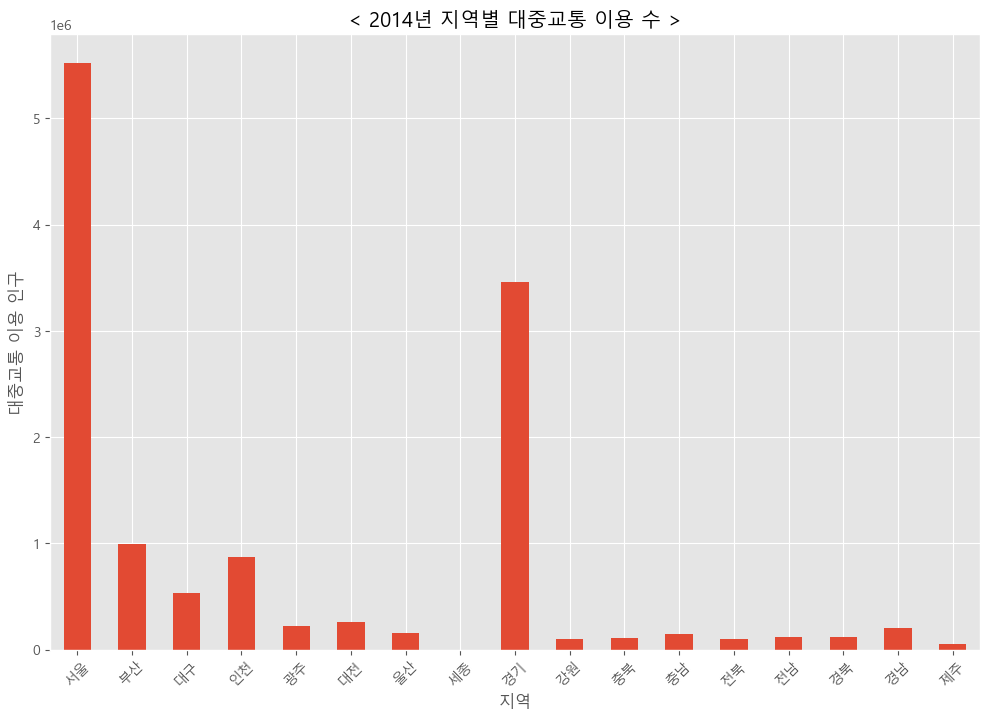

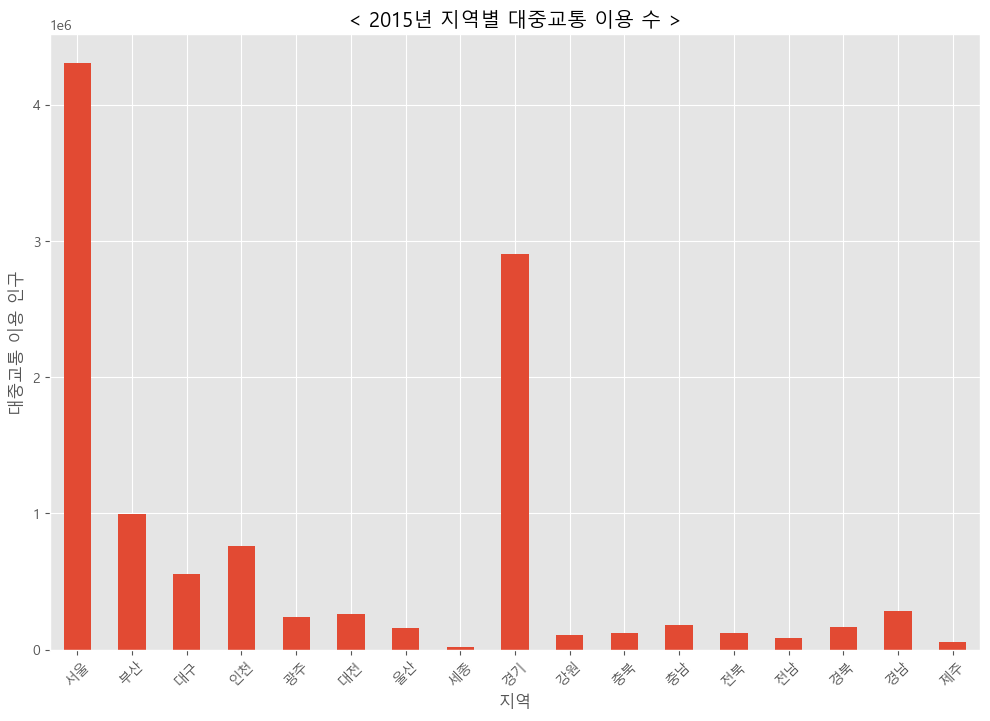

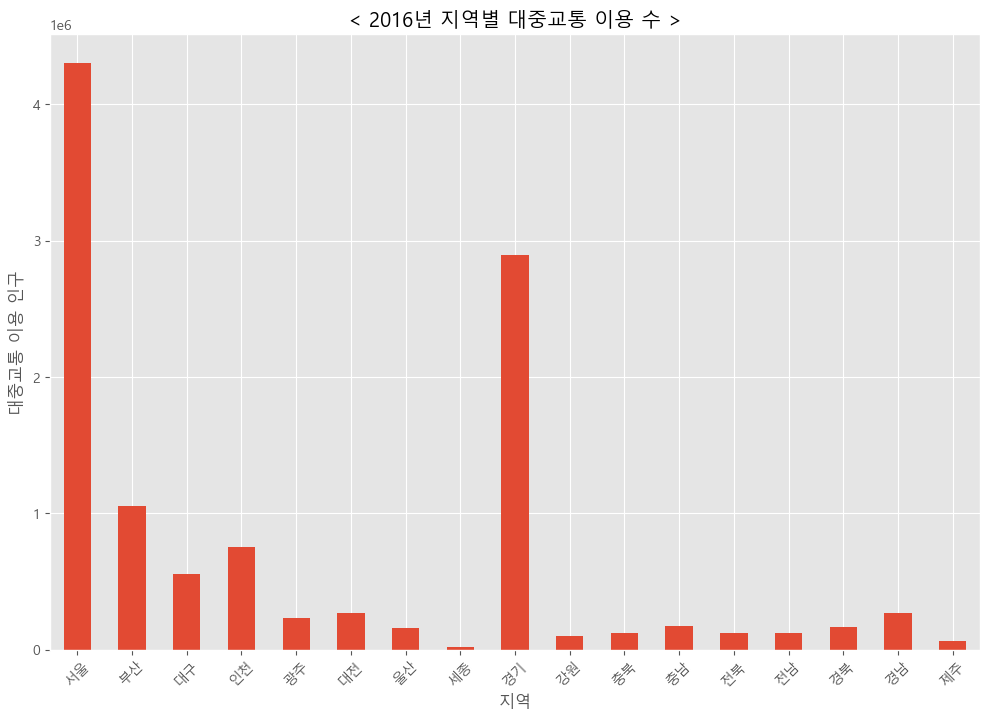

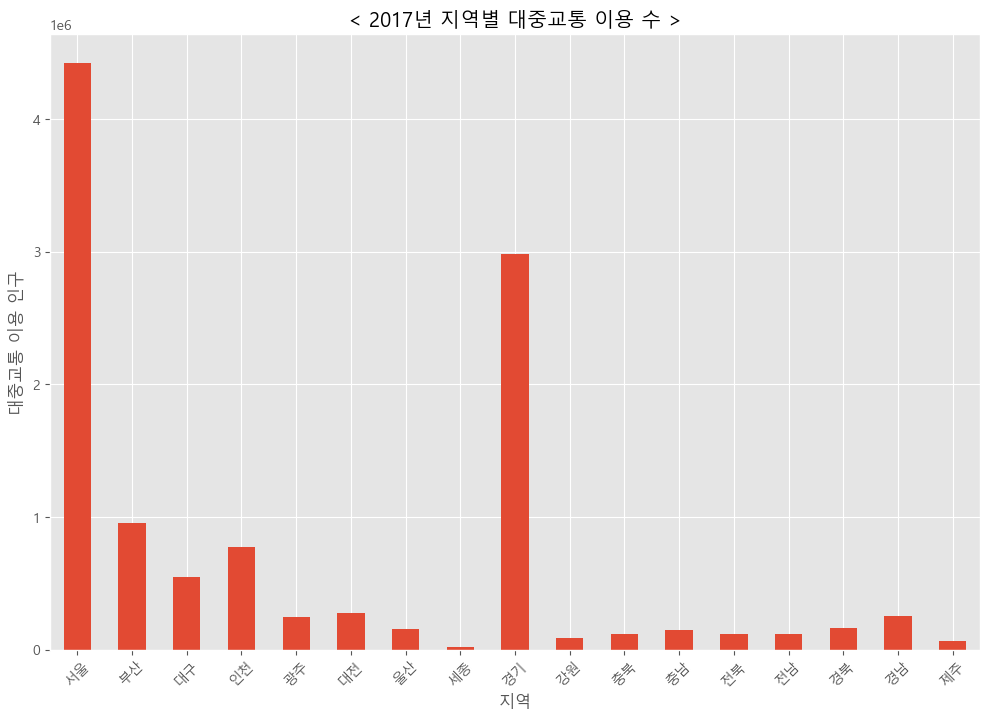

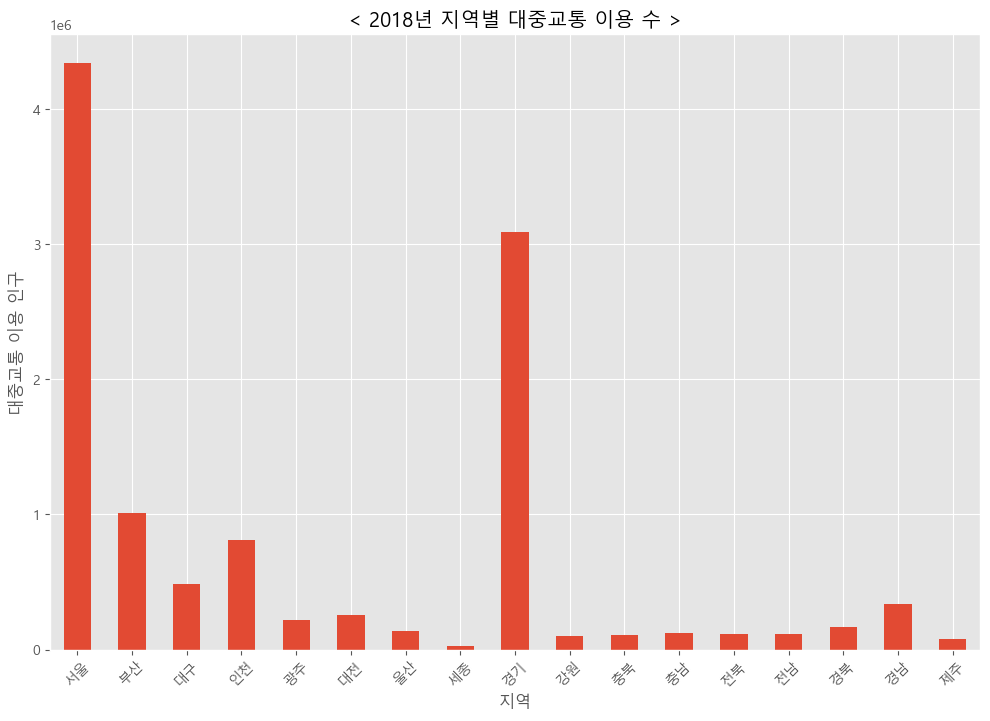

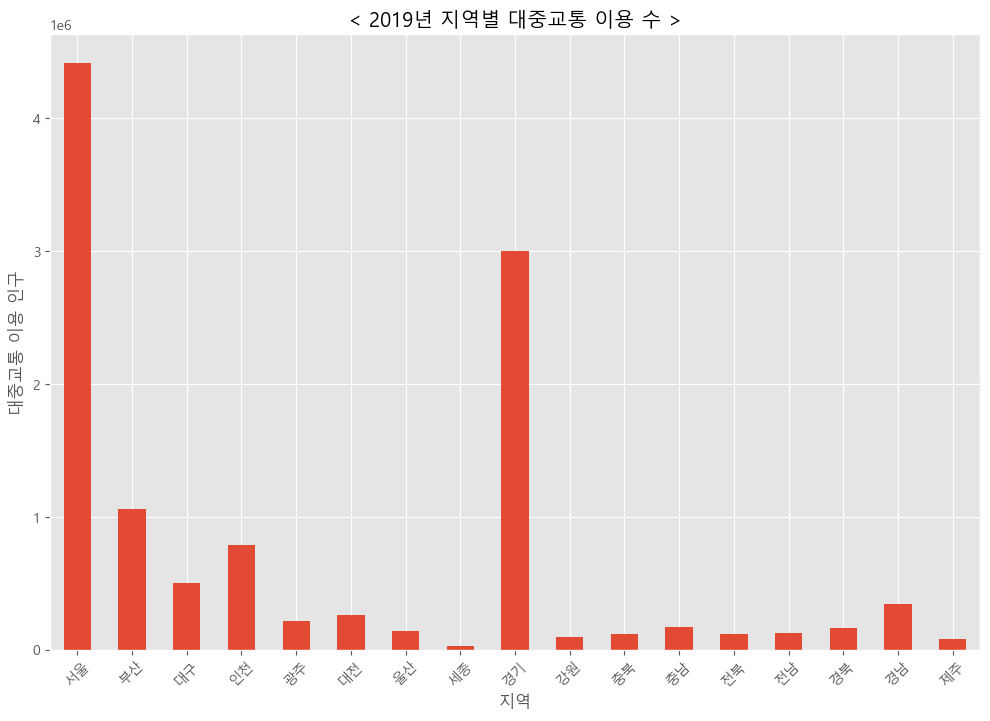

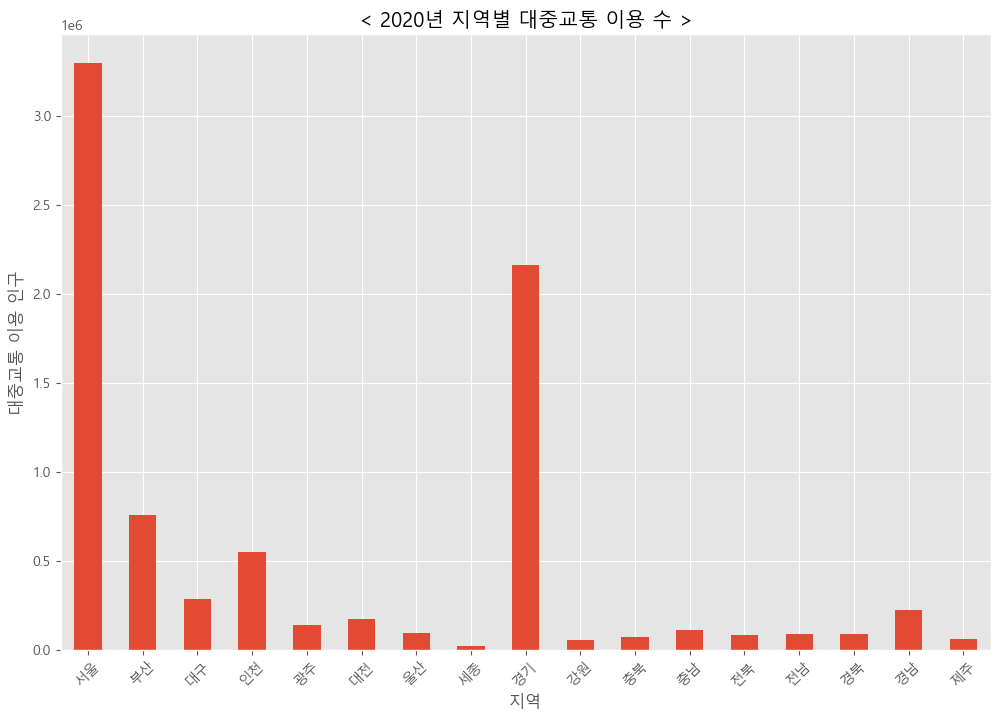

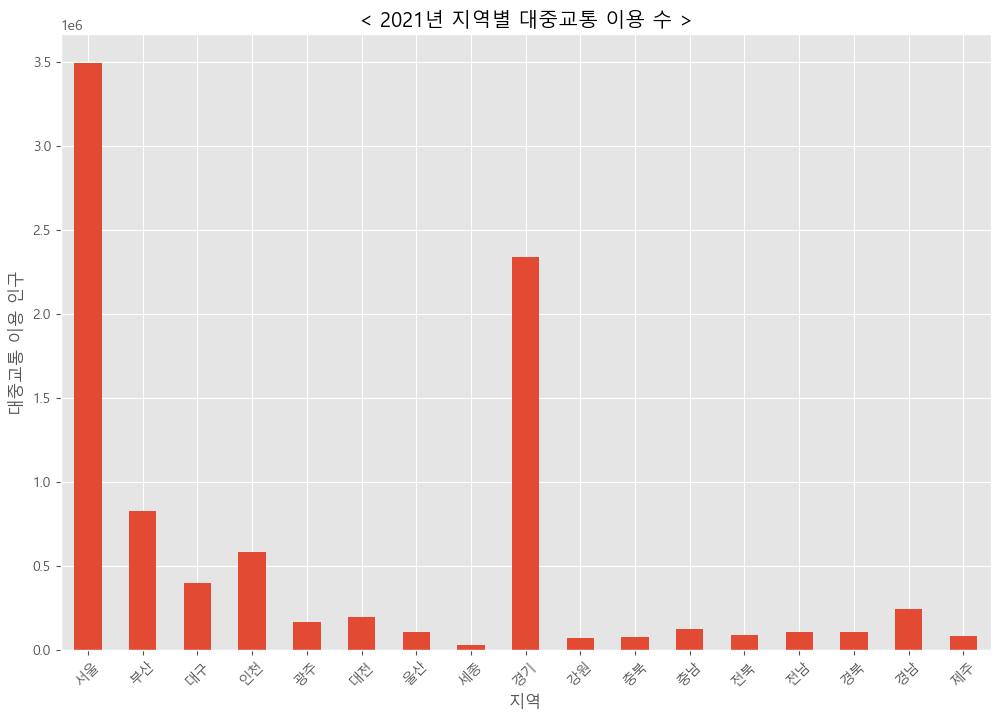

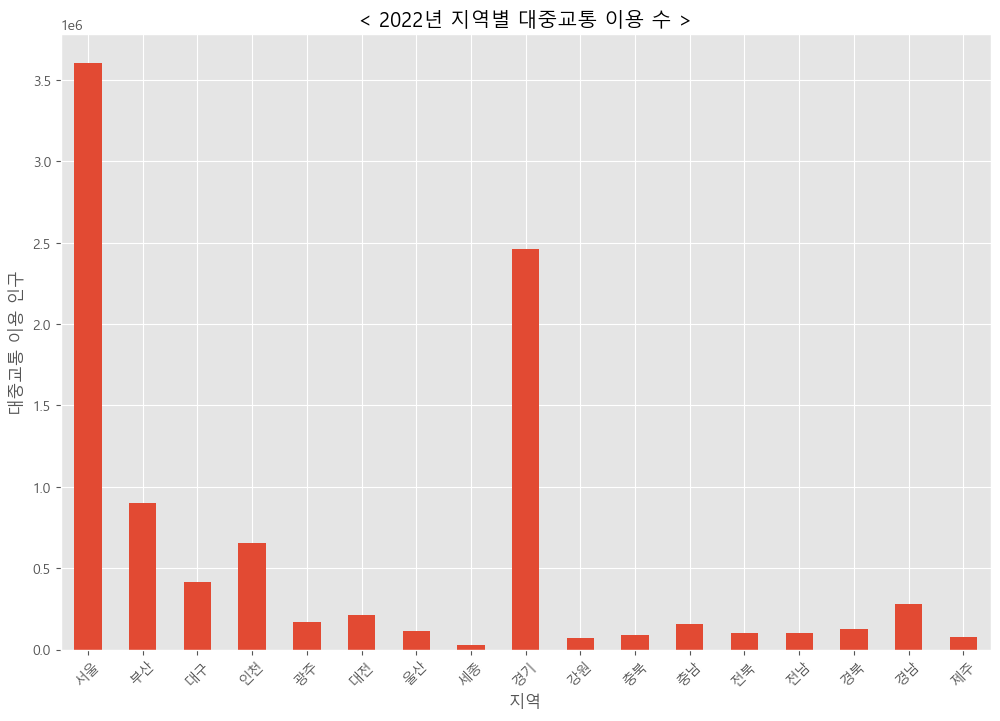

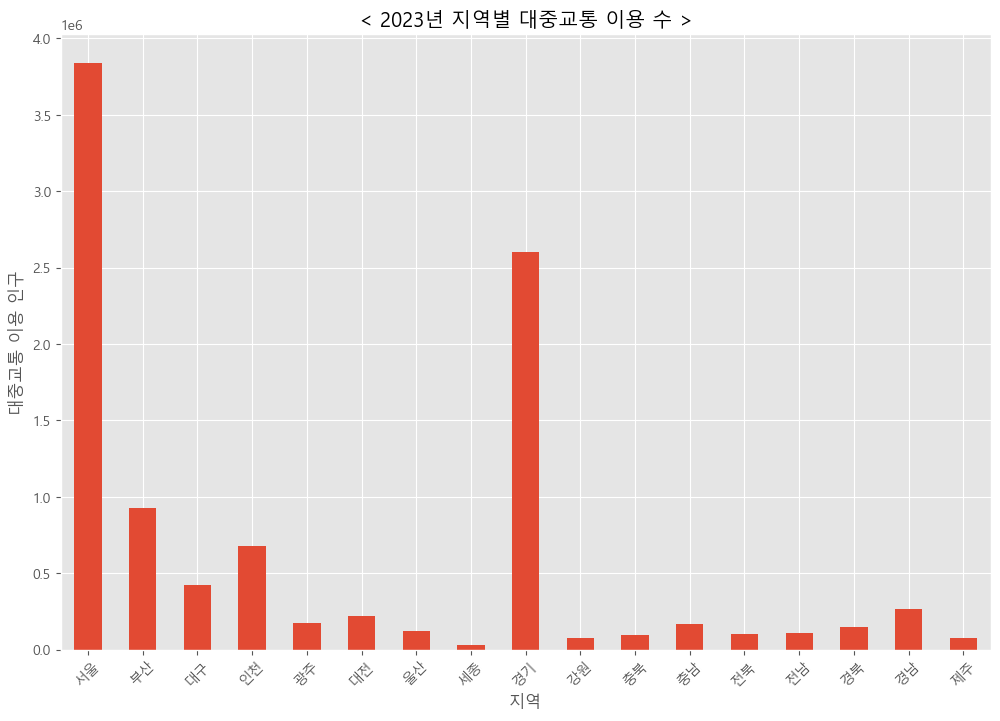

In [15]:
plt.style.use('ggplot')
for year in p_df['연도']:
    year_data = p_df[p_df['연도'] == year].iloc[0, 1:]
    plt.figure(figsize=(12, 8))
    year_data.plot(kind='bar')
    plt.title(f"< {year}년 지역별 대중교통 이용 수 >")
    plt.xlabel("지역")
    plt.ylabel("대중교통 이용 인구")
    plt.xticks(rotation=45)

Text(0, 0.5, '대중교통 이용 인구')

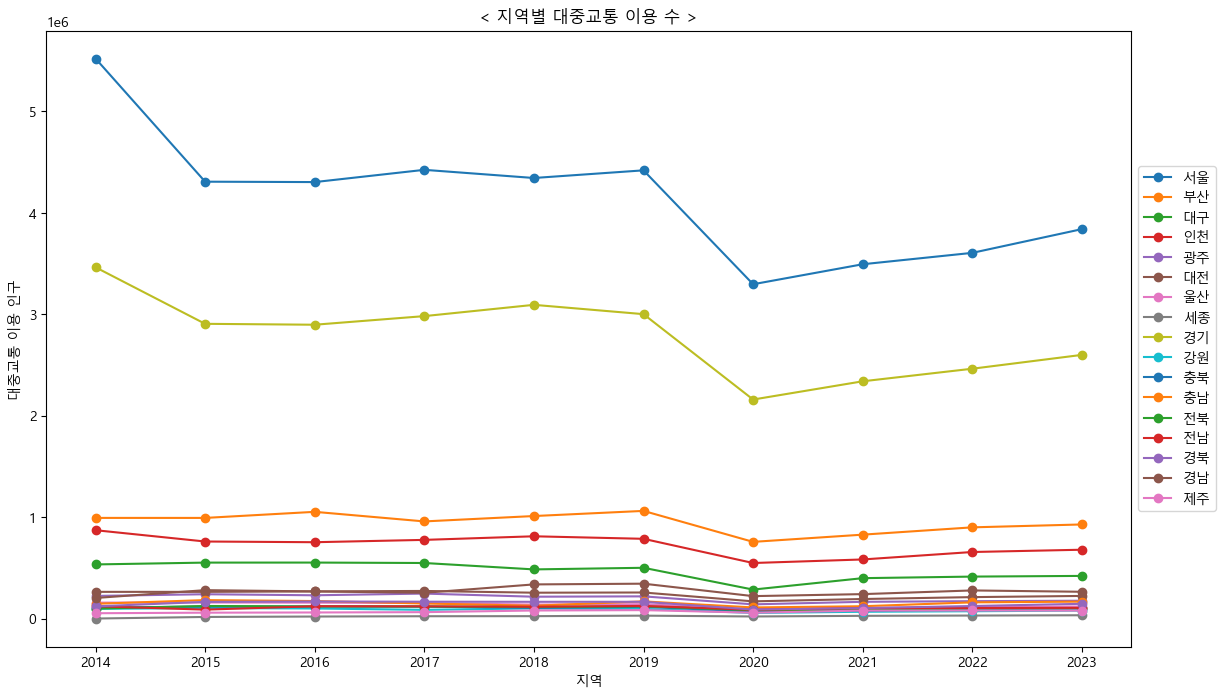

In [8]:
plt.figure(figsize=(14, 8))
for region in p_df.columns[1:]:
    plt.plot(p_df['연도'], p_df[region], marker='o', label=region)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("< 지역별 대중교통 이용 수 >")
plt.xlabel("지역")
plt.ylabel("대중교통 이용 인구")